In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def runge_kutta(y, x, dx, f):
    """ y is the initial value for y
        x is the initial value for x
        dx is the time step in x
        f is derivative of function y(t)
    """
    k1 = dx * f(y, t)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [ ]:
if __name__=='__main__':
    t = 0.
    y = 1.
    dt = .1
    ys, ts = [], []
    def func(y, t):
        return t * math.sqrt(y)
    while t <= 10:
        y = runge_kutta(y, t, dt, func)
        t += dt
        ys.append(y)
        ts.append(t)

    exact = [(t ** 2 + 4) ** 2 / 16. for t in ts]
    plt.plot(ts, ys, label='runge_kutta')
    plt.plot(ts, exact, label='exact')
    plt.legend()
    plt.show()
    error = np.array(exact) - np.array(ys)
    print("max error {:.5f}".format(max(error)))

In [29]:
def f0(p, t):
    return -0.5 * p[0] + 0.8 * p[3] + 2 * p[4]
def f1(p, t):
    return 0.5 * p[0] - 2 * p[1]
def f2(p, t):
    return 2 * p[1] - 3 * p[2]
def f3(p, t):
    return 1.5 * p[2] - 0.8 * p[3]
def f4(p, t):
    return 1.5 * p[2] - 2 * p[4]

In [30]:
f = (f0, f1, f2, f3, f4)

In [113]:
def rk4(y, x, dx, f):
    k1, k2, k3, k4 = np.zeros((5)), np.zeros((5)), np.zeros((5)), np.zeros((5))
    
    k1[0] = dx * f[0](y, t)
    k1[1] = dx * f[1](y, t)
    k1[2] = dx * f[2](y, t)
    k1[3] = dx * f[3](y, t)
    k1[4] = dx * f[4](y, t)
    
    k2[0] = dx * f[0](y + 0.5 * k1, x + 0.5 * dx)
    k2[1] = dx * f[1](y + 0.5 * k1, x + 0.5 * dx)
    k2[2] = dx * f[2](y + 0.5 * k1, x + 0.5 * dx)
    k2[3] = dx * f[3](y + 0.5 * k1, x + 0.5 * dx)
    k2[4] = dx * f[4](y + 0.5 * k1, x + 0.5 * dx)
    
    k3[0] = dx * f[0](y + 0.5 * k2, x + 0.5 * dx)
    k3[1] = dx * f[1](y + 0.5 * k2, x + 0.5 * dx)
    k3[2] = dx * f[2](y + 0.5 * k2, x + 0.5 * dx)
    k3[3] = dx * f[3](y + 0.5 * k2, x + 0.5 * dx)
    k3[4] = dx * f[4](y + 0.5 * k2, x + 0.5 * dx)
    
    k4[0] = dx * f[0](y + k3, x + dx)
    k4[1] = dx * f[1](y + k3, x + dx)
    k4[2] = dx * f[2](y + k3, x + dx)
    k4[3] = dx * f[3](y + k3, x + dx)
    k4[4] = dx * f[4](y + k3, x + dx)
    
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [114]:
p0 = np.array([1, 0, 0, 0, 0])
t0 = 0
dt = 0.3

In [209]:
p = p0.copy()
t = t0
p_hist = [p]
t_hist = []
for t in np.linspace(0, 5, 15, endpoint=False):
    t_hist.append(t)    
    p = rk4(p, t, dt, f)
    p_hist.append(p) 
t_hist.append(5)    


In [210]:
p_hist = np.array(p_hist)
t_hist = np.array(t_hist)

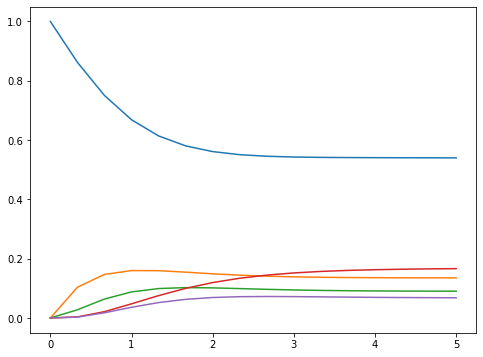

In [252]:
plt.figure(figsize=(8,6))
plt.plot(t_hist, p_hist[:])

In [215]:
print(np.round(p_hist, 3))

[[1.    0.    0.    0.    0.   ]
 [0.862 0.104 0.028 0.004 0.003]
 [0.75  0.147 0.064 0.021 0.018]
 [0.669 0.16  0.088 0.048 0.036]
 [0.614 0.159 0.099 0.075 0.052]
 [0.58  0.155 0.102 0.1   0.063]
 [0.561 0.149 0.101 0.119 0.069]
 [0.551 0.144 0.099 0.134 0.072]
 [0.545 0.141 0.097 0.145 0.072]
 [0.543 0.139 0.094 0.152 0.072]
 [0.542 0.137 0.093 0.157 0.071]
 [0.541 0.136 0.092 0.16  0.07 ]
 [0.541 0.136 0.091 0.163 0.07 ]
 [0.54  0.136 0.091 0.164 0.069]
 [0.54  0.135 0.09  0.166 0.068]
 [0.54  0.135 0.09  0.166 0.068]]


In [216]:
print(np.round(t_hist, 3).reshape(-1, 1))

[[0.   ]
 [0.333]
 [0.667]
 [1.   ]
 [1.333]
 [1.667]
 [2.   ]
 [2.333]
 [2.667]
 [3.   ]
 [3.333]
 [3.667]
 [4.   ]
 [4.333]
 [4.667]
 [5.   ]]


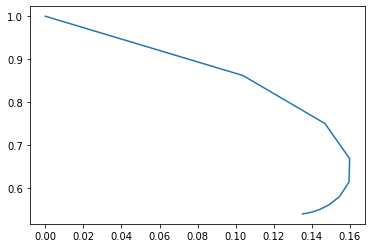

In [217]:
plt.plot(p_hist[:, 1], p_hist[:, 0])

In [218]:
A = np.array([[-0.5, 0, 0, 0.8, 2], [0.5, -2, 0, 0, 0], [0, 2, -3, 0, 0], [0, 0, 1.5, -0.8, 0], [0, 0, 1.5, 0, -2]])
A

array([[-0.5,  0. ,  0. ,  0.8,  2. ],
       [ 0.5, -2. ,  0. ,  0. ,  0. ],
       [ 0. ,  2. , -3. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.5, -0.8,  0. ],
       [ 0. ,  0. ,  1.5,  0. , -2. ]])

In [256]:
ch, vec = np.linalg.eig(A)
print(np.round(ch, 3).reshape(-1, 1))

[[-3.523+0.j   ]
 [ 0.   +0.j   ]
 [-1.848+1.123j]
 [-1.848-1.123j]
 [-1.08 +0.j   ]]


In [231]:
B = np.vstack([A[:4], [1, 1, 1, 1, 1]])

In [232]:
B

array([[-0.5,  0. ,  0. ,  0.8,  2. ],
       [ 0.5, -2. ,  0. ,  0. ,  0. ],
       [ 0. ,  2. , -3. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.5, -0.8,  0. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

In [249]:
ver = np.linalg.solve(B, [0, 0, 0, 0, 1])
print(np.round(ver * 100, 2).reshape(-1, 1))

[[53.93]
 [13.48]
 [ 8.99]
 [16.85]
 [ 6.74]]


In [254]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (p_hist)

## save to xlsx file

filepath = 'my_excel_file.xlsx'

df.to_excel(filepath, index=False)

ModuleNotFoundError: No module named 'openpyxl'